# PREDICTION USING SUPERVISED MACHINE LEARNING

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### IMPORTING THE DATASET

In [2]:
dataset = pd.read_csv('http://bit.ly/w-data')
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### PLOTTING SCATTER PLOT

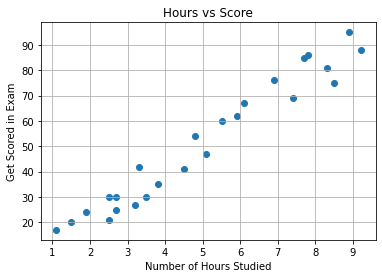

In [4]:
plt.grid()
plt.scatter(X,y)
plt.xlabel('Number of Hours Studied')
plt.ylabel('Get Scored in Exam')
plt.title('Hours vs Score')
plt.show()

##### In the given data 'Scores' is linearly correlated with 'Hours', So we will use linear regression to predict in future.

### SPLITTING THE DATASET INTO TRAINING SET AND TEST SET

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### TRAINING THE LINEAR REGRESSION MODEL

In [6]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
mreg = sm.OLS(y_train, X_train).fit()
mreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     353.5
Date:                Sun, 09 May 2021   Prob (F-statistic):           2.79e-13
Time:                        18:20:25   Log-Likelihood:                -62.686
No. Observations:                  20   AIC:                             129.4
Df Residuals:                      18   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0182      3.057      0.660      0.517      -4.404       8.441
x1             9.9107      0.527     18.802      0.000       8.803      11.018
==============================================================================
Omnibus:                        4.659   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                1.720
Skew:                          -0.296   Prob(JB):                        0.423
Kurtosis:                       1.691   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### PLOTING REGRESSION LINE

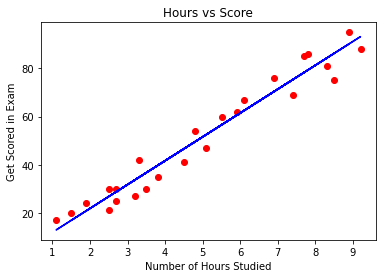

In [7]:
plt.scatter(X, y, color = 'red')
X1 = sm.add_constant(X)
plt.plot(X, mreg.predict(X1), color = 'blue')
plt.xlabel('Number of Hours Studied')
plt.ylabel('Get Scored in Exam')
plt.title('Hours vs Score')
plt.show()

### PREDICTING THE TEST DATA

In [8]:
X_test = sm.add_constant(X_test)
y_pred = mreg.predict(X_test)

### ACTUAL vs PREDICTED

In [9]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### EVALUATING THE TEST RESULTS

In [10]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error = ', mean_absolute_error(y_test, y_pred))

Mean Absolute Error =  4.183859899002978


### Question: What will be predicted score if a student studies for 9.25 hrs/ day?

In [11]:
hours = 9.25
percentage = mreg.predict([1, hours])[0]
print('Percentage, when someone studies',hours, 'hrs/day : ', percentage)

Percentage, when someone studies 9.25 hrs/day :  93.69173248737538
